In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from tqdm import tqdm
from sklearn.preprocessing import StandardScaler


cm = 1/2.54

plt.rcParams["axes.edgecolor"] = "black"
plt.rcParams["axes.linewidth"] = 1
plt.rcParams["axes.facecolor"] = 'white'

import matplotlib as mpl
import numpy as np
from matplotlib import pyplot as plt

mpl.rcParams["mathtext.fontset"] = "stix"
mpl.rcParams['pdf.fonttype'] = 42

## Dimensionality reduction of midbrain dataset

We normalized TPM counts using the best normalization according to SCONE. We remove cells that express oligodendrocyte and astrocyte gene markers. Then we apply PCA.

In [2]:
norm_tpm = pd.read_csv('data/preprocess/scone_norm_tpm.tab.gz', sep='\t', index_col=0)
glia = norm_tpm.columns[(norm_tpm.loc['Hepacam'] >= 1) | (norm_tpm.loc['Ednrb'] >= 1)  | (norm_tpm.loc['Olig1'] >= 1) | (norm_tpm.loc['Ramp1'] >= 1) | (norm_tpm.loc['Aldh1l1'] >= 1)]
neurogenesis_cells = [x for x in norm_tpm.columns if x not in glia]
norm_tpm_neuro = norm_tpm[neurogenesis_cells]

high_expression = norm_tpm_neuro.index[norm_tpm_neuro.mean(axis=1) >= 0.1]
fano = (norm_tpm_neuro.loc[high_expression].var(axis=1)/norm_tpm_neuro.loc[high_expression].mean(axis=1)).sort_values()
pca_norm_tiklova = PCA(n_components=30)

scaled_counts = pd.DataFrame(StandardScaler().fit_transform(norm_tpm_neuro.loc[fano.index[-1000:]].T).T,
                             index = fano.index[-1000:], columns = norm_tpm_neuro.columns)

pca_norm_tiklova = pca_norm_tiklova.fit_transform(scaled_counts.T)


rd = pd.DataFrame()
for i in range(30):
    rd['PC_' + str(i+1)] = pca_norm_tiklova.T[i]

rd.index = neurogenesis_cells
rd.PC_2 = - rd.PC_2


Plotting, and coloring by reported cell type.

<Figure size 432x288 with 0 Axes>

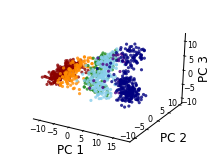

In [3]:

meta = pd.read_csv('data/SraRunTable.txt.gz', index_col=0)

from matplotlib import pyplot as plt
colores = []
for cell in meta.loc[rd.index].Age:
    if cell == 'embryonic day 13.5':
        colores.append('darkred')
    if cell == 'embryonic day 15.5':
        colores.append('darkorange')
    if cell == 'embryonic day 18.5':
        colores.append('forestgreen')
    if cell == 'postnatal day 1':
        colores.append('skyblue')
    if cell == 'postnatal day 7':
        colores.append('indigo')
    if cell == 'postnatal day 90':
        colores.append('navy')
        
from matplotlib import pyplot as plt
colores = []
for cell in meta.loc[rd.index].Age:
    if cell == 'embryonic day 13.5':
        colores.append('darkred')
    if cell == 'embryonic day 15.5':
        colores.append('darkorange')
    if cell == 'embryonic day 18.5':
        colores.append('forestgreen')
    if cell == 'postnatal day 1':
        colores.append('skyblue')
    if cell == 'postnatal day 7':
        colores.append('indigo')
    if cell == 'postnatal day 90':
        colores.append('navy')
        
from matplotlib.gridspec import GridSpec
plt.tight_layout()
fig = plt.figure(figsize=(9*cm, 6.75*cm))
ax = fig.add_subplot(111, projection='3d')

ax.grid(False)
ax.scatter(rd.PC_1, rd.PC_2, rd.PC_3, c=colores, s=10, linewidth=0, alpha=0.8)
ax.set_yticks([-10, -5, 0, 5, 10])
ax.tick_params(labelsize=8, length=5)#, direction="in", pad=-22)
ax.tick_params(axis='y',labelsize=8, length=5, direction="in", pad=-15)
ax.tick_params(axis='x',labelsize=8, length=5, direction="out", pad=-5)
ax.tick_params(axis='z',labelsize=8, length=5, direction="out", pad=-4)

ax.set_xlabel('PC 1', fontsize=12,labelpad=-5)
ax.set_ylabel('PC 2', fontsize=12,labelpad=-5)
ax.set_zlabel('PC 3', fontsize=12,labelpad=-8, rotation=90)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)

ax.xaxis.pane.fill = False
ax.yaxis.pane.fill = False
ax.zaxis.pane.fill = False

ax.xaxis.pane.set_edgecolor('w')
ax.yaxis.pane.set_edgecolor('w')
ax.zaxis.pane.set_edgecolor('w')

plt.savefig('psix_output/plots/PCA_neurogenesis3D.png', bbox_inches='tight', res=20000, dpi =2000)

In [6]:
# rd[['PC_1', 'PC_2', 'PC_3']].to_csv('data/pc3_rd.tab.gz', sep='\t', index=True, header=True)